In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['train.csv', 'sample_submission.csv', 'test.csv']


In [2]:
pip install --upgrade git+https://github.com/pytorch/text

  Cloning https://github.com/pytorch/text to /tmp/pip-req-build-_g28yag0
  Running command git clone -q https://github.com/pytorch/text /tmp/pip-req-build-_g28yag0
  Created wheel for torchtext: filename=torchtext-0.4.0-cp36-none-any.whl size=51974 sha256=c392dff2b4c895a104b617a6c291d093f82d0f3070a7be74852e6295ea0e79f8
  Stored in directory: /tmp/pip-ephem-wheel-cache-incv_xdv/wheels/73/14/71/ed033fd999ae4933e17df3e91be2014e61c2f312a88a164ff5
Successfully built torchtext
  Found existing installation: torchtext 0.3.1
    Uninstalling torchtext-0.3.1:
      Successfully uninstalled torchtext-0.3.1
Note: you may need to restart the kernel to use updated packages.


In [3]:
train = pd.read_csv("../input/train.csv")
print(train[:5])
print()
test = pd.read_csv("../input/test.csv")                   
print(test[:2])

   Id                                             review  sentiment
0   0  I have done a lot of international travel, bot...          1
1   1  One of the most frightening game experiences e...          1
2   2  I was amazingly impressed by this movie. It co...          1
3   3  This film is stale, and misses the mark. It is...          0
4   4  At last!! Sandra Bullock is indeed a beautiful...          1

      Id                                             review
0  35000  When I watched L'Appartement with my girlfrien...
1  35001  I work at Memorial Hermann Hospital (TMC) and ...


In [4]:
##### Now let's create a wordcloud to get a better understanding of our corpus
import matplotlib.pyplot as plt
from wordcloud import WordCloud
##### Download using conda install -c conda-forge wordcloud

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(background_color='black',).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    plt.imshow(wordcloud)
    plt.show()

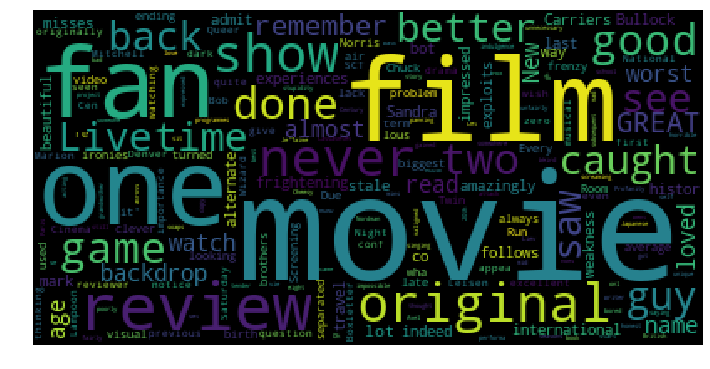

In [5]:
show_wordcloud(train['review'])

In [6]:
from string import punctuation
print(punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [7]:
all_text = ''.join([c for c in train if c not in punctuation])
print ('Number of reviews :', len(train))

Number of reviews : 35000


In [8]:
word_list=[]
list_question=list(train["review"])
for sentence in list_question:
	words_sentence=sentence.split()
	for words in words_sentence:
		word_list.append(words)


word_list=[word for sentence in list(train["review"]) for word in sentence.split()]

In [9]:
import re
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
frequency=Counter(word_list)

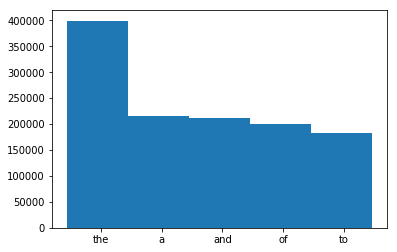

In [10]:
import matplotlib.pyplot as plt
import numpy as np

labels,values = zip(*frequency.items())
labels=[]
values=[]
for T in frequency.most_common(5):
    labels.append(T[0])
    values.append(T[1])

indexes = np.arange(len(labels))
width = 1

plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.05, labels)
plt.show()

In [11]:
### Remove Punctuations and change words to lower case
def remove_punctuations(text):    
    words=[word.lower() for word in text.split()] 
    words=[w for word in words for w in re.sub(r'[^\w\s]',' ',word).split()]    
    return words

train["review_punctuation_removed"]= train["review"].apply(remove_punctuations)


In [12]:
### Remove StopWords
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))
print (stop)
def remove_stopwords(text):
	modified_word_list=[word for word in text if word not in stop]
	return modified_word_list

train["review_stopword_removed"]=train["review_punctuation_removed"].apply(remove_stopwords)

{'over', 'him', 'are', "that'll", "should've", 'to', 'were', 'of', 'about', 'with', 'only', "shouldn't", 'weren', 'as', "didn't", 'because', 'themselves', 'now', 'down', 'where', 'be', 'mustn', 'itself', 'off', 'few', 'for', 'any', 'all', 'your', 'here', 'doing', 'between', 'me', 'in', 'more', 'we', 'whom', 'hasn', 'if', 'once', "you're", 'himself', 'and', 'a', 's', 'too', 'nor', 'some', 'having', 'not', 'aren', 'then', 'just', 'didn', 'very', "she's", 'its', 've', 'each', 'being', 'ourselves', 'both', 'an', 'i', 're', "hasn't", "aren't", 'am', 'but', 'it', 'there', 'from', 'same', 'them', 'll', "won't", 'she', 'couldn', 'yours', 'ours', 'why', 'do', 'he', 'out', 'is', "isn't", 'into', 'their', 'been', 'by', 'through', "it's", 'myself', 'those', "doesn't", "haven't", 'haven', 'yourself', 'won', 'shouldn', 'other', 'which', 'at', 'shan', 'm', 'when', 'or', "needn't", 'her', 'doesn', 'wouldn', 'that', 'own', 'than', 'they', 'who', 'no', "wasn't", 'such', 'isn', 'during', "hadn't", "you'v

In [13]:
### Stemming of Words
from nltk.stem.porter import PorterStemmer
st=PorterStemmer()
def Stemming(text):
	stemmed_words=[st.stem(word) for word in text] 
	return stemmed_words

train["review_stemmed"]=train["review_stopword_removed"].apply(Stemming)


In [14]:
### Recreating the sentence
def Recreate(text):
	word=" ".join(text)
	return word

train["modified_sentence"]= train["review_stemmed"].apply(Recreate)


In [15]:
def Cleaning(text):
    text_punctuation_removed=remove_punctuations(text)
    text_stopword_removed=remove_stopwords(text_punctuation_removed)
    text_stemmed=Stemming(text_stopword_removed)
    final_text=Recreate(text_stemmed)
    print (final_text)
    return final_text
    

In [16]:
column_name = "Id"
df = train
dummies = pd.get_dummies(df[column_name], prefix = column_name)
dummies.head()

,Id_0,Id_1,Id_2,Id_3,Id_4,Id_5,Id_6,Id_7,Id_8,Id_9,...,Id_34990,Id_34991,Id_34992,Id_34993,Id_34994,Id_34995,Id_34996,Id_34997,Id_34998,Id_34999
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
def create_dummies(df, column_name):
    dummies = pd.get_dummies(df[column_name], prefix = column_name)
    df = pd.concat([df,dummies], axis = 1)
    return df

train = create_dummies(train, "Id")
test = create_dummies(test, "Id")
train.head()

,Id,review,sentiment,review_punctuation_removed,review_stopword_removed,review_stemmed,modified_sentence,Id_0,Id_1,Id_2,...,Id_34990,Id_34991,Id_34992,Id_34993,Id_34994,Id_34995,Id_34996,Id_34997,Id_34998,Id_34999
0,0,"I have done a lot of international travel, bot...",1,"[i, have, done, a, lot, of, international, tra...","[done, lot, international, travel, business, t...","[done, lot, intern, travel, busi, tourist, typ...",done lot intern travel busi tourist type assur...,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,One of the most frightening game experiences e...,1,"[one, of, the, most, frightening, game, experi...","[one, frightening, game, experiences, ever, ma...","[one, frighten, game, experi, ever, make, keep...",one frighten game experi ever make keep light ...,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,2,I was amazingly impressed by this movie. It co...,1,"[i, was, amazingly, impressed, by, this, movie...","[amazingly, impressed, movie, contained, funda...","[amazingli, impress, movi, contain, fundament,...",amazingli impress movi contain fundament eleme...,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,3,"This film is stale, and misses the mark. It is...",0,"[this, film, is, stale, and, misses, the, mark...","[film, stale, misses, mark, far, compared, 89,...","[film, stale, miss, mark, far, compar, 89, bat...",film stale miss mark far compar 89 batman tri ...,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,At last!! Sandra Bullock is indeed a beautiful...,1,"[at, last, sandra, bullock, is, indeed, a, bea...","[last, sandra, bullock, indeed, beautiful, wom...","[last, sandra, bullock, inde, beauti, woman, f...",last sandra bullock inde beauti woman final fo...,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
from google.cloud import bigquery
client = bigquery.Client()



Using Kaggle's public dataset BigQuery integration.


In [19]:
print(f'Number of training examples: {len(train)}')
test = pd.read_csv("../input/test.csv")
print(f'Number of testing examples: {len(test)}')

Number of training examples: 35000
Number of testing examples: 15000


In [20]:
valid = np.split(df, [3000], axis=1)
print(valid)

[          Id                                             review sentiment  \
0          0  I have done a lot of international travel, bot...         1   
1          1  One of the most frightening game experiences e...         1   
2          2  I was amazingly impressed by this movie. It co...         1   
3          3  This film is stale, and misses the mark. It is...         0   
4          4  At last!! Sandra Bullock is indeed a beautiful...         1   
5          5  This film is a very good movie.The way how the...         1   
6          6  "Carriers" follows the exploits of two guys an...         0   
7          7  I admit I have a weakness for alternate histor...         1   
8          8  I'm a fan of the 1950's original and about 20 ...         0   
9          9  A below average looking video game is turned i...         0   
10        10  I've always been a fan of Chuck Norris for wha...         0   
11        11  I caught "On the Run" at the Screening Room in...         1  

In [21]:
print(f'Number of training examples: {len(train)}')
print(f'Number of validation examples: {len(valid)}')
print(f'Number of testing examples: {len(test)}')

Number of training examples: 35000
Number of validation examples: 2
Number of testing examples: 15000


In [22]:
import torch
from torchtext import data

SEED = 1234

torch.manual_seed(SEED)
torch.backends.cudnn.deterministic = True

review = data.Field(tokenize = 'spacy')
sentiment = data.LabelField(dtype = torch.int)

In [23]:
MAX_VOCAB_SIZE = 25_000

review.build_vocab(train, max_size = MAX_VOCAB_SIZE)
sentiment.build_vocab(train)
print(f"Unique tokens in review vocabulary: {len(review.vocab)}")
print(f"Unique tokens in sentiment vocabulary: {len(sentiment.vocab)}")

Unique tokens in review vocabulary: 30
Unique tokens in sentiment vocabulary: 35007


In [24]:
print(review.vocab.freqs.most_common(20))

[('d', 35007), ('_', 35006), ('I', 35001), ('1', 24500), ('2', 24500), ('3', 19500), ('4', 14500), ('5', 13500), ('6', 13500), ('7', 13500), ('8', 13500), ('9', 13500), ('0', 13390), ('e', 20), ('i', 8), ('r', 7), ('t', 7), ('v', 6), ('n', 6), ('m', 6)]


In [25]:
print(sentiment.vocab.stoi)

defaultdict(None, {'Id': 0, 'Id_0': 1, 'Id_1': 2, 'Id_10': 3, 'Id_100': 4, 'Id_1000': 5, 'Id_10000': 6, 'Id_10001': 7, 'Id_10002': 8, 'Id_10003': 9, 'Id_10004': 10, 'Id_10005': 11, 'Id_10006': 12, 'Id_10007': 13, 'Id_10008': 14, 'Id_10009': 15, 'Id_1001': 16, 'Id_10010': 17, 'Id_10011': 18, 'Id_10012': 19, 'Id_10013': 20, 'Id_10014': 21, 'Id_10015': 22, 'Id_10016': 23, 'Id_10017': 24, 'Id_10018': 25, 'Id_10019': 26, 'Id_1002': 27, 'Id_10020': 28, 'Id_10021': 29, 'Id_10022': 30, 'Id_10023': 31, 'Id_10024': 32, 'Id_10025': 33, 'Id_10026': 34, 'Id_10027': 35, 'Id_10028': 36, 'Id_10029': 37, 'Id_1003': 38, 'Id_10030': 39, 'Id_10031': 40, 'Id_10032': 41, 'Id_10033': 42, 'Id_10034': 43, 'Id_10035': 44, 'Id_10036': 45, 'Id_10037': 46, 'Id_10038': 47, 'Id_10039': 48, 'Id_1004': 49, 'Id_10040': 50, 'Id_10041': 51, 'Id_10042': 52, 'Id_10043': 53, 'Id_10044': 54, 'Id_10045': 55, 'Id_10046': 56, 'Id_10047': 57, 'Id_10048': 58, 'Id_10049': 59, 'Id_1005': 60, 'Id_10050': 61, 'Id_10051': 62, 'Id_1005

In [26]:
import torch.nn as nn
import torch.nn.functional as F
criterion = nn.BCEWithLogitsLoss()

In [27]:
pip install --upgrade git+https://github.com/pytorch/text

  Cloning https://github.com/pytorch/text to /tmp/pip-req-build-sjhnj7r0
  Running command git clone -q https://github.com/pytorch/text /tmp/pip-req-build-sjhnj7r0
  Created wheel for torchtext: filename=torchtext-0.4.0-cp36-none-any.whl size=51974 sha256=a64b274175565ddb46369cda4ca7794cf64de4123b28323af1e2a99987acce4c
  Stored in directory: /tmp/pip-ephem-wheel-cache-olvums__/wheels/73/14/71/ed033fd999ae4933e17df3e91be2014e61c2f312a88a164ff5
Successfully built torchtext
  Found existing installation: torchtext 0.4.0
    Uninstalling torchtext-0.4.0:
      Successfully uninstalled torchtext-0.4.0
Note: you may need to restart the kernel to use updated packages.


In [28]:
#with CNN

In [29]:
import torch
from torchtext import data
from torchtext import datasets
import random

SEED = 1234

torch.manual_seed(SEED)
torch.backends.cudnn.deterministic = True

review = data.Field(tokenize = 'spacy')
sentiment = data.LabelField(dtype = torch.float)

train_data, test_data = datasets.IMDB.splits(review, sentiment)

train_data, valid_data = train_data.split(random_state = random.seed(SEED))

aclImdb_v1.tar.gz:   0%|          | 0.00/84.1M [00:00<?, ?B/s]

downloading aclImdb_v1.tar.gz


aclImdb_v1.tar.gz: 100%|██████████| 84.1M/84.1M [00:03<00:00, 22.6MB/s]


In [30]:
MAX_VOCAB_SIZE = 25_000

review.build_vocab(train_data, 
                 max_size = MAX_VOCAB_SIZE, 
                 vectors = "glove.6B.100d", 
                 unk_init = torch.Tensor.normal_)

sentiment.build_vocab(train_data)

.vector_cache/glove.6B.zip: 862MB [00:23, 36.6MB/s]                               
100%|█████████▉| 399604/400000 [00:18<00:00, 22286.64it/s]

In [31]:
import torch
from torchtext import data, datasets
from torchtext.data import Iterator, BucketIterator
BATCH_SIZE = 64
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

train_iterator, valid_iterator, test_iterator = BucketIterator.splits((train_data, valid_data, test_data), batch_size = BATCH_SIZE,device = device, # the BucketIterator needs to be told what function it should use to group the data.
 sort_within_batch=False,
 repeat=False) # we pass repeat=False because we want to wrap this Iterator layer

In [32]:
import torch.nn as nn
import torch.nn.functional as F

class CNN(nn.Module):
    def __init__(self, vocab_size, embedding_dim, n_filters, filter_sizes, output_dim, 
                 dropout, pad_idx):
        
        super().__init__()
        
        self.embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx = pad_idx)
        
        self.conv_0 = nn.Conv2d(in_channels = 1, 
                                out_channels = n_filters, 
                                kernel_size = (filter_sizes[0], embedding_dim))
        
        self.conv_1 = nn.Conv2d(in_channels = 1, 
                                out_channels = n_filters, 
                                kernel_size = (filter_sizes[1], embedding_dim))
        
        self.conv_2 = nn.Conv2d(in_channels = 1, 
                                out_channels = n_filters, 
                                kernel_size = (filter_sizes[2], embedding_dim))
        
        self.fc = nn.Linear(len(filter_sizes) * n_filters, output_dim)
        
        self.dropout = nn.Dropout(dropout)
        
    def forward(self, text):
        
        #text = [sent len, batch size]
        
        text = text.permute(1, 0)
                
        #text = [batch size, sent len]
        
        embedded = self.embedding(text)
                
        #embedded = [batch size, sent len, emb dim]
        
        embedded = embedded.unsqueeze(1)
        
        #embedded = [batch size, 1, sent len, emb dim]
        
        conved_0 = F.relu(self.conv_0(embedded).squeeze(3))
        conved_1 = F.relu(self.conv_1(embedded).squeeze(3))
        conved_2 = F.relu(self.conv_2(embedded).squeeze(3))
            
        #conved_n = [batch size, n_filters, sent len - filter_sizes[n] + 1]
        
        pooled_0 = F.max_pool1d(conved_0, conved_0.shape[2]).squeeze(2)
        pooled_1 = F.max_pool1d(conved_1, conved_1.shape[2]).squeeze(2)
        pooled_2 = F.max_pool1d(conved_2, conved_2.shape[2]).squeeze(2)
        
        #pooled_n = [batch size, n_filters]
        
        cat = self.dropout(torch.cat((pooled_0, pooled_1, pooled_2), dim = 1))

        #cat = [batch size, n_filters * len(filter_sizes)]
            
        return self.fc(cat)

In [33]:
class CNN(nn.Module):
    def __init__(self, vocab_size, embedding_dim, n_filters, filter_sizes, output_dim, 
                 dropout, pad_idx):
        
        super().__init__()
                
        self.embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx = pad_idx)
        
        self.convs = nn.ModuleList([
                                    nn.Conv2d(in_channels = 1, 
                                              out_channels = n_filters, 
                                              kernel_size = (fs, embedding_dim)) 
                                    for fs in filter_sizes
                                    ])
        
        self.fc = nn.Linear(len(filter_sizes) * n_filters, output_dim)
        
        self.dropout = nn.Dropout(dropout)
        
    def forward(self, text):
        
        #text = [sent len, batch size]
        
        text = text.permute(1, 0)
                
        #text = [batch size, sent len]
        
        embedded = self.embedding(text)
                
        #embedded = [batch size, sent len, emb dim]
        
        embedded = embedded.unsqueeze(1)
        
        #embedded = [batch size, 1, sent len, emb dim]
        
        conved = [F.relu(conv(embedded)).squeeze(3) for conv in self.convs]
            
        #conved_n = [batch size, n_filters, sent len - filter_sizes[n] + 1]
                
        pooled = [F.max_pool1d(conv, conv.shape[2]).squeeze(2) for conv in conved]
        
        #pooled_n = [batch size, n_filters]
        
        cat = self.dropout(torch.cat(pooled, dim = 1))

        #cat = [batch size, n_filters * len(filter_sizes)]
            
        return self.fc(cat)

In [34]:
INPUT_DIM = len(review.vocab)
EMBEDDING_DIM = 100
N_FILTERS = 100
FILTER_SIZES = [3,4,5]
OUTPUT_DIM = 1
DROPOUT = 0.5
PAD_IDX = review.vocab.stoi[review.pad_token]

model = CNN(INPUT_DIM, EMBEDDING_DIM, N_FILTERS, FILTER_SIZES, OUTPUT_DIM, DROPOUT, PAD_IDX)

In [35]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f'The model has {count_parameters(model):,} trainable parameters')

The model has 2,620,801 trainable parameters


In [36]:
pretrained_embeddings = review.vocab.vectors

model.embedding.weight.data.copy_(pretrained_embeddings)

tensor([[-0.1117, -0.4966,  0.1631,  ...,  1.2647, -0.2753, -0.1325],
        [-0.8555, -0.7208,  1.3755,  ...,  0.0825, -1.1314,  0.3997],
        [-0.0382, -0.2449,  0.7281,  ..., -0.1459,  0.8278,  0.2706],
        ...,
        [-0.0540,  0.6001, -0.0981,  ..., -0.2348,  0.0206,  0.4487],
        [ 0.6937,  0.1152,  0.7751,  ...,  0.0188,  0.0298,  0.3674],
        [-0.0041, -0.7265, -0.3370,  ..., -0.1124, -0.3297, -0.7553]])

In [37]:

MAX_VOCAB_SIZE = 25_000

review.build_vocab(train_data, 
                 max_size = MAX_VOCAB_SIZE, 
                 vectors = "glove.6B.100d", 
                 unk_init = torch.Tensor.normal_)

sentiment.build_vocab(train_data)
UNK_IDX = review.vocab.stoi[review.unk_token]

model.embedding.weight.data[UNK_IDX] = torch.zeros(EMBEDDING_DIM)
model.embedding.weight.data[PAD_IDX] = torch.zeros(EMBEDDING_DIM)

In [38]:
import torch.optim as optim

optimizer = optim.Adam(model.parameters())

criterion = nn.BCEWithLogitsLoss()

model = model.to(device)
criterion = criterion.to(device)

In [39]:
def binary_accuracy(preds, y):
    """
    Returns accuracy per batch, i.e. if you get 8/10 right, this returns 0.8, NOT 8
    """

    #round predictions to the closest integer
    rounded_preds = torch.round(torch.sigmoid(preds))
    correct = (rounded_preds == y).float() #convert into float for division 
    acc = correct.sum() / len(correct)
    return acc

In [40]:
def train(model, iterator, optimizer, criterion):
    
    epoch_loss = 0
    epoch_acc = 0
    
    model.train()
    
    for batch in iterator:
        
        optimizer.zero_grad()
        
        predictions = model(batch.text).squeeze(1)
        
        loss = criterion(predictions, batch.label)
        
        acc = binary_accuracy(predictions, batch.label)
        
        loss.backward()
        
        optimizer.step()
        
        epoch_loss += loss.item()
        epoch_acc += acc.item()
        
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [41]:
def evaluate(model, iterator, criterion):
    
    epoch_loss = 0
    epoch_acc = 0
    
    model.eval()
    
    with torch.no_grad():
    
        for batch in iterator:

            predictions = model(batch.text).squeeze(1)
            
            loss = criterion(predictions, batch.label)
            
            acc = binary_accuracy(predictions, batch.label)

            epoch_loss += loss.item()
            epoch_acc += acc.item()
        
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [42]:
import time

def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

In [43]:
N_EPOCHS = 5

best_valid_loss = float('inf')

for epoch in range(N_EPOCHS):

    start_time = time.time()
    
    train_loss, train_acc = train(model, train_iterator, optimizer, criterion)
    valid_loss, valid_acc = evaluate(model, valid_iterator, criterion)
    
    end_time = time.time()

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)
    
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'tut4-model.pt')
    
    print(f'Epoch: {epoch+1:02} | Epoch Time: {epoch_mins}m {epoch_secs}s')
    print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc*100:.2f}%')

100%|█████████▉| 399604/400000 [00:29<00:00, 22286.64it/s]

Epoch: 01 | Epoch Time: 0m 20s
	Train Loss: 0.653 | Train Acc: 61.31%
	 Val. Loss: 0.507 |  Val. Acc: 77.95%
Epoch: 02 | Epoch Time: 0m 18s
	Train Loss: 0.435 | Train Acc: 80.09%
	 Val. Loss: 0.368 |  Val. Acc: 83.44%
Epoch: 03 | Epoch Time: 0m 19s
	Train Loss: 0.312 | Train Acc: 86.86%
	 Val. Loss: 0.315 |  Val. Acc: 86.53%
Epoch: 04 | Epoch Time: 0m 19s
	Train Loss: 0.227 | Train Acc: 91.11%
	 Val. Loss: 0.302 |  Val. Acc: 87.38%
Epoch: 05 | Epoch Time: 0m 19s
	Train Loss: 0.163 | Train Acc: 93.90%
	 Val. Loss: 0.316 |  Val. Acc: 87.06%


In [44]:

model.load_state_dict(torch.load('tut4-model.pt'))

test_loss, test_acc = evaluate(model, test_iterator, criterion)

print(f'Test Loss: {test_loss:.3f} | Test Acc: {test_acc*100:.2f}%')

Test Loss: 0.335 | Test Acc: 85.55%


In [112]:
import spacy
nlp = spacy.load('en')

def predict_sentiment(model, train, min_len = 5):
    model.eval()
    tokenized = [tok.text for tok in nlp.tokenizer(sentence)]
    if len(tokenized) < min_len:
        tokenized += ['<pad>'] * (min_len - len(tokenized))
    indexed = [review.vocab.stoi[t] for t in tokenized]
    tensor = torch.LongTensor(indexed).to(device)
    tensor = tensor.unsqueeze(1)
    prediction = torch.sigmoid(model(tensor))
    return prediction.item()



In [102]:
predict_sentiment(model,"This film is terrible")

0.18598826229572296

In [47]:
predict_sentiment(model, "This film is great")

0.9852553606033325